<a href="https://colab.research.google.com/github/arelies-proximo/ML-Projects/blob/main/KNN/knn_buying_a_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN K-Nearest Neaighbour
Votes from k Closest Neighbour





---


**Wether a Person will buy a product (SUV)based on Age and Salary**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv("SocialNetworkAds.csv")

In [3]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
374,15793890,Female,37,80000,0
358,15573926,Male,40,71000,1
7,15694829,Female,32,150000,1
166,15762228,Female,22,55000,0
142,15617134,Male,35,59000,0


In [5]:
X = df.iloc[:, [2,3]].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [6]:
Y = df.iloc[:,4].values

**Splitting the dataset**

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Model Training**

In [11]:
from sklearn.neighbors import KNeighborsClassifier as knc
model = knc(n_neighbors=5, metric='minkowski', p=2)
model.fit(x_train, y_train)

KNeighborsClassifier()

**Predicting Test Results**

In [12]:
y_pred = model.predict(x_test)

#EVALUATION


**CONFUSION MATRIX**

**IT IS USED IN CLASSIFICATION MODELS**

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [14]:
#Accuracy

(64+29)/(64+29+4+3)*100

93.0

**The Model Predicts with 93% Accuracy**

*Pretty Nice*

#VISUALIZATION

TRAINING DATASET

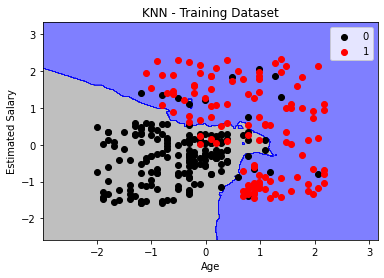

In [17]:
from matplotlib.colors import ListedColormap
xset, yset = x_train, y_train

x1, x2 = np.meshgrid(np.arange(start=xset[:,0].min()-1, stop = xset[:,0].max()+1, step=0.01),
                     np.arange(start=xset[:,1].min()-1, stop = xset[:,1].max()+1, step=0.01))

plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.50, cmap=ListedColormap(('grey', 'blue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(yset)):
  plt.scatter(xset[yset==j,0], xset[yset==j,1],
              c=ListedColormap(('black', 'red'))(i),label=j)


plt.title('KNN - Training Dataset')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

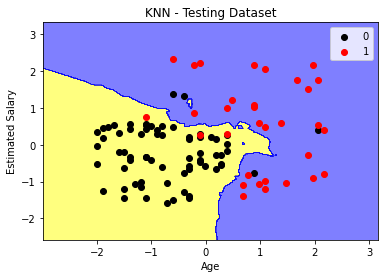

In [18]:
#TESTING DATASET

xset, yset = x_test, y_test

x1, x2 = np.meshgrid(np.arange(start=xset[:,0].min()-1, stop = xset[:,0].max()+1, step=0.01),
                     np.arange(start=xset[:,1].min()-1, stop = xset[:,1].max()+1, step=0.01))

plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.50, cmap=ListedColormap(('yellow', 'blue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(yset)):
  plt.scatter(xset[yset==j,0], xset[yset==j,1],
              c=ListedColormap(('black', 'red'))(i),label=j)


plt.title('KNN - Testing Dataset')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **THE END !**